# **Uber Data Analysis**

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Data Collection**

In [2]:
# Load the dataset
a = pd.read_csv("Uber.csv")

# Copy the data
data = a.copy()

# Take a breif look at the data
data.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


# **Basic information**

In [3]:
# Rename columns if needed

# Get the dimensions of the dataframe
data.shape

(354, 4)

In [4]:
# Get the row names of the dataframe
data.index

RangeIndex(start=0, stop=354, step=1)

In [5]:
# Get the column names of the dataframe
data.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [6]:
# Dimension
data.ndim

2

In [7]:
# Display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


**The dataset contains 354 rows and 4 columns:**

*   dispatching_base_number (object) – Identifier for the base (fleet).
*   date (object) – Date of trips (needs conversion to datetime).
*   active_vehicles (int) – Number of active vehicles on that date.
*   trips (int) – Number of trips completed.

# **Data Cleaning**

In [8]:
# Convert date to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract date-based features
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

In [9]:
# Check for the duplicated rows

data.duplicated().sum()    # No duplicates

0

In [10]:
# Check for the null values

data.isnull().sum()

,0
dispatching_base_number,0
date,0
active_vehicles,0
trips,0
year,0
month,0
day,0
day_of_week,0


<Axes: >

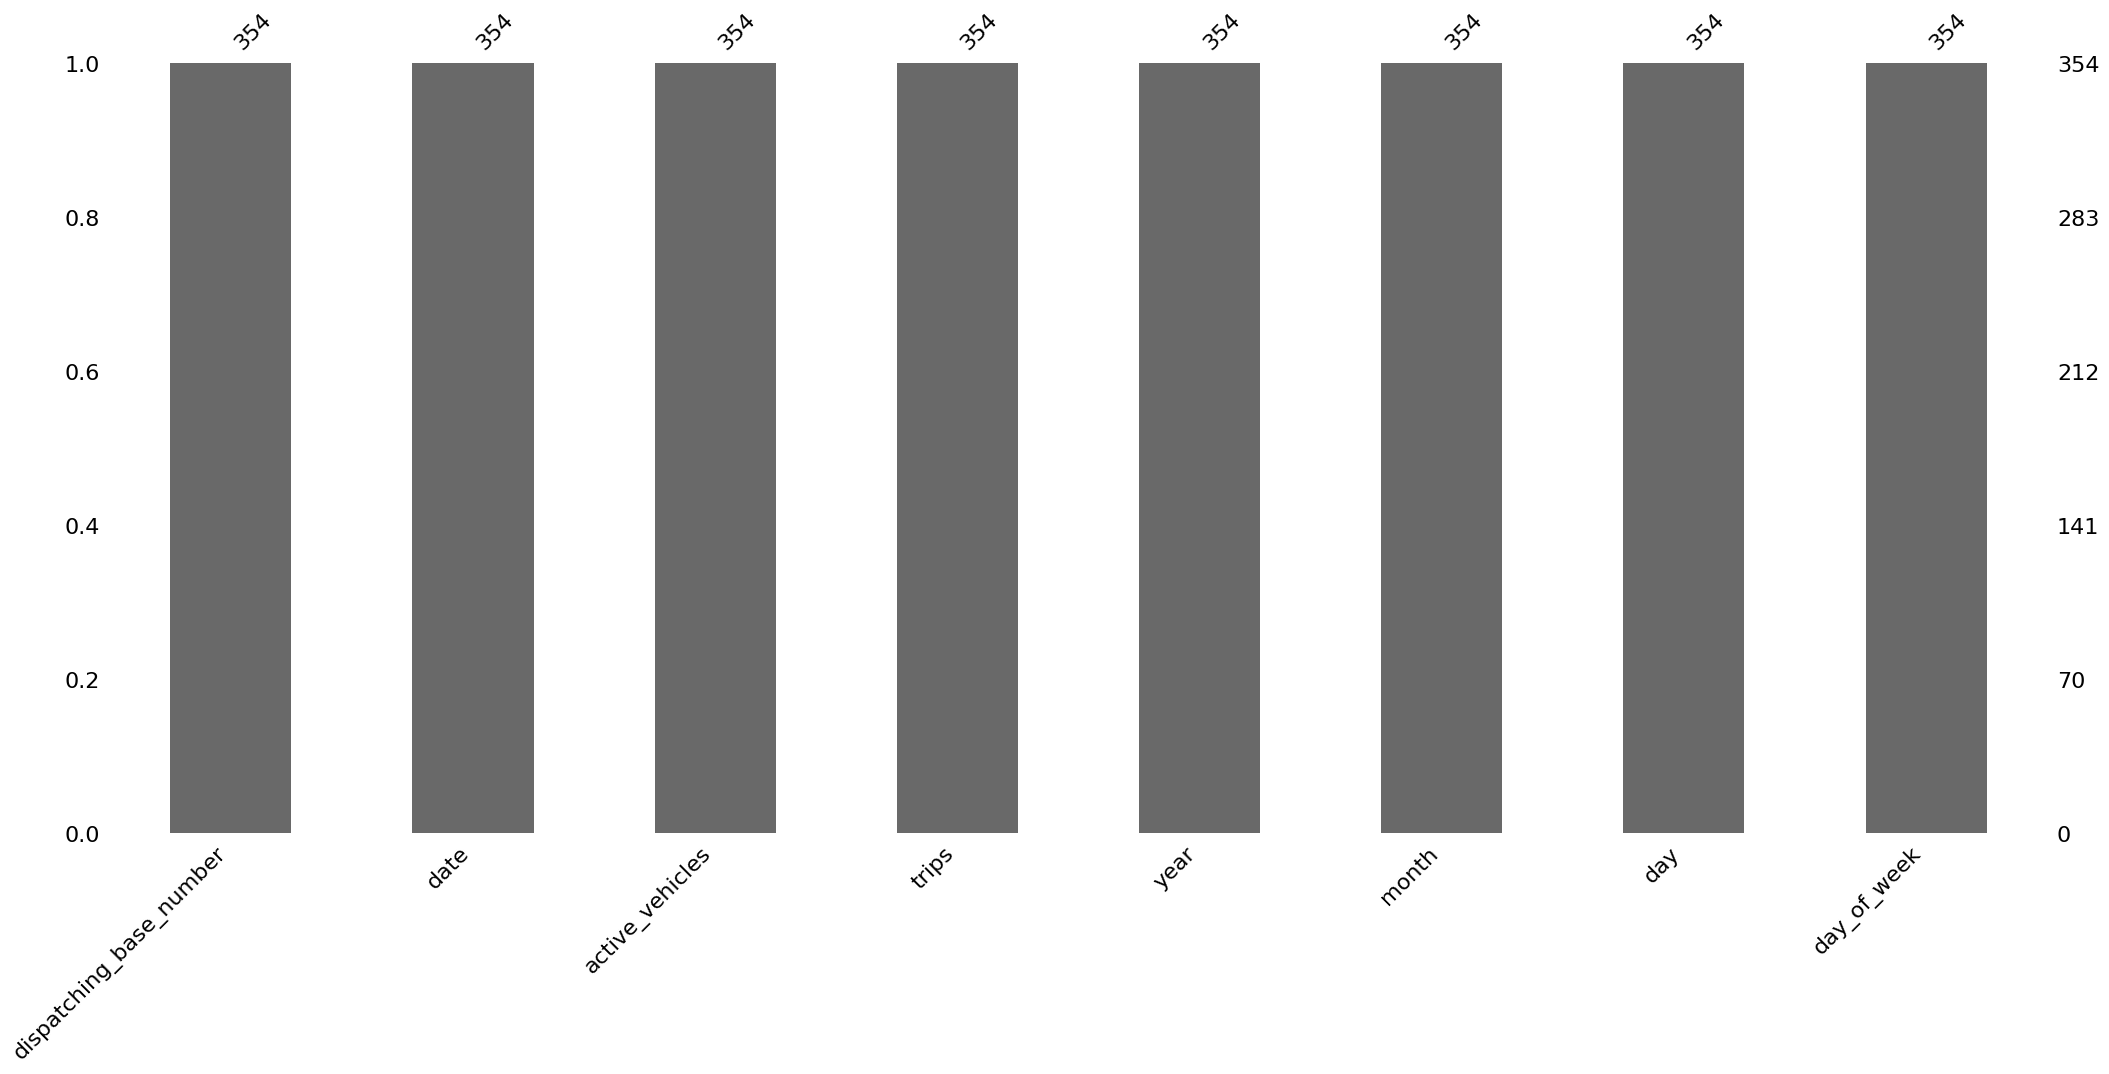

In [11]:
msno.bar(data)   # Check for the null values by graph

**Outliers**

<Axes: ylabel='active_vehicles'>

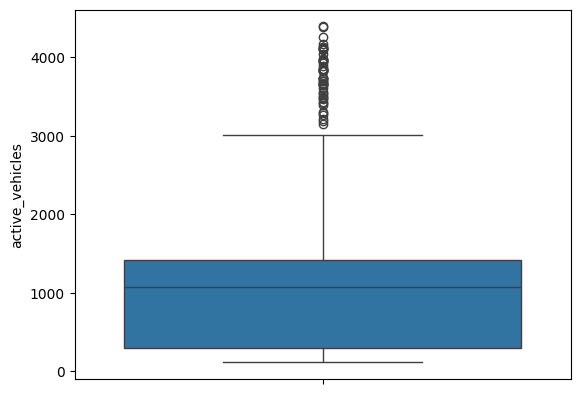

In [12]:
sns.boxplot(data['active_vehicles'])

In [13]:
# Remove outliers for active_vehicles using IQR method
Q1 = data['active_vehicles'].quantile(0.25)
Q3 = data['active_vehicles'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['active_vehicles'] >= (Q1 - 1.5 * IQR)) | (data['active_vehicles'] <= (Q3 + 1.5 * IQR))]

# **Exploratory Data Analysis (EDA)**

In [14]:
data.describe(include = 'all')

,dispatching_base_number,date,active_vehicles,trips,year,month,day,day_of_week
count,354,354,354.000000,354.000000,354.0,354.000000,354.000000,354.000000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B02512,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2015-01-30 00:00:00,1307.435028,11667.316384,2015.0,1.474576,15.288136,3.050847
min,NaN,2015-01-01 00:00:00,112.000000,629.000000,2015.0,1.000000,1.000000,0.000000
25%,NaN,2015-01-15 00:00:00,296.750000,2408.500000,2015.0,1.000000,8.000000,1.000000
50%,NaN,2015-01-30 00:00:00,1077.000000,9601.000000,2015.0,1.000000,15.000000,3.000000
75%,NaN,2015-02-14 00:00:00,1417.000000,13711.250000,2015.0,2.000000,23.000000,5.000000
max,NaN,2015-02-28 00:00:00,4395.000000,45858.000000,2015.0,2.000000,31.000000,6.000000


In [15]:
# See the unique values in the dataset
data.nunique()

,0
dispatching_base_number,6
date,59
active_vehicles,314
trips,348
year,1
month,2
day,31
day_of_week,7


# **Data Visualization**

In [16]:
daily_trips = data.groupby("date")["trips"].sum()
daily_vehicles = data.groupby("date")["active_vehicles"].sum()

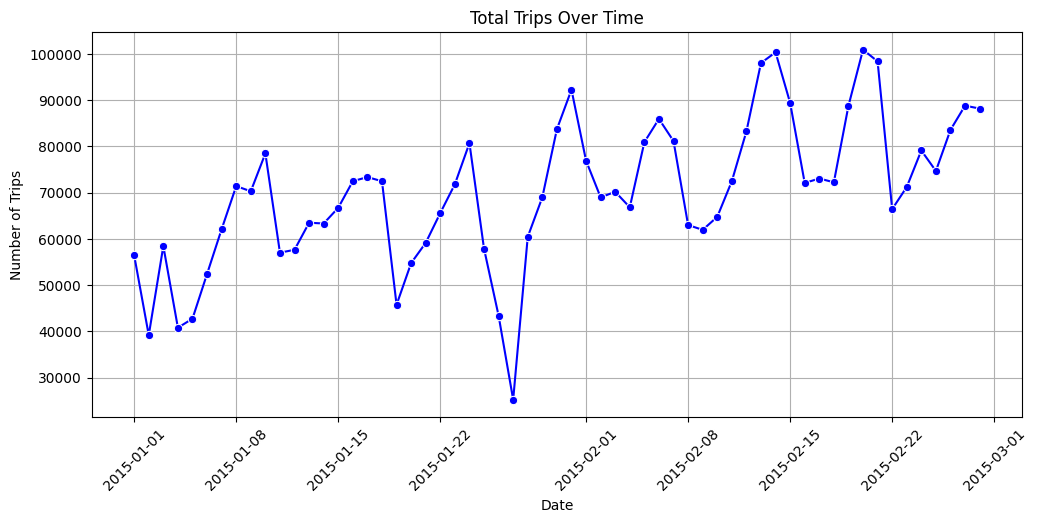

In [17]:

# Plot Trips Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_trips.index, y=daily_trips.values, marker="o", color="blue")
plt.title("Total Trips Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

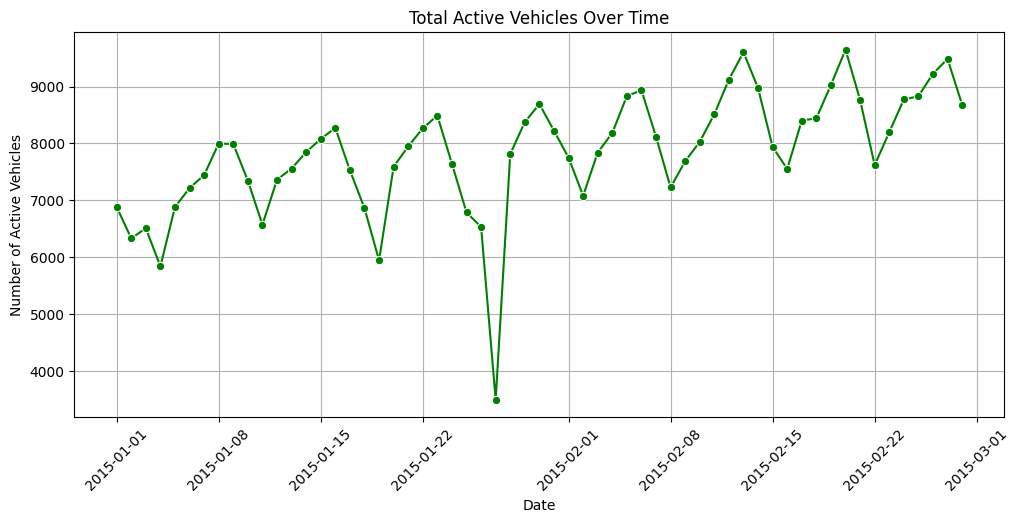

In [18]:

# Plot Active Vehicles Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_vehicles.index, y=daily_vehicles.values, marker="o", color="green")
plt.title("Total Active Vehicles Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Active Vehicles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-19-f14e90333695>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=base_trips.index, y=base_trips.values, palette="viridis")


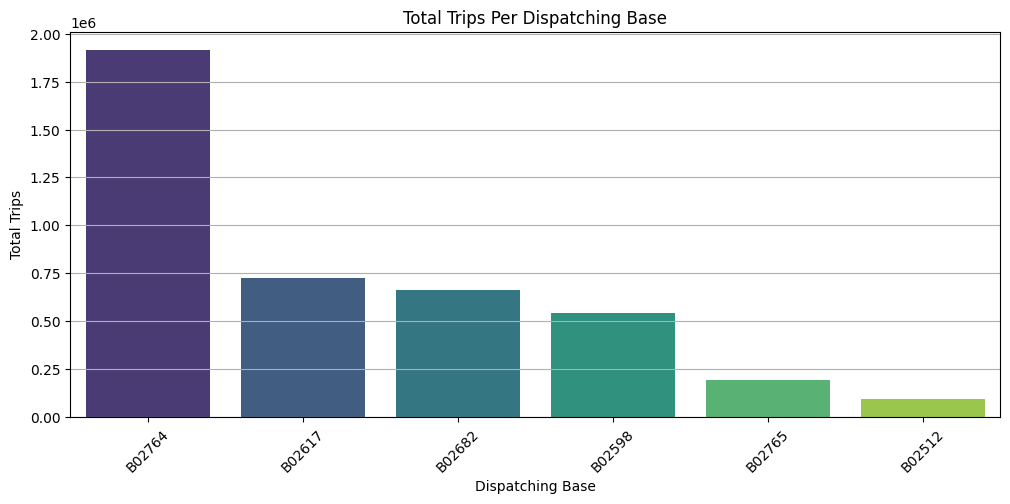

In [19]:

# Plot Trips Per Base
plt.figure(figsize=(12, 5))
base_trips = data.groupby("dispatching_base_number")["trips"].sum().sort_values(ascending=False)
sns.barplot(x=base_trips.index, y=base_trips.values, palette="viridis")
plt.title("Total Trips Per Dispatching Base")
plt.xlabel("Dispatching Base")
plt.ylabel("Total Trips")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

**Endcoding if necessary and drop unwanted columns**

In [20]:
data.drop(columns=['dispatching_base_number', 'date'], inplace=True)  # Drop unneeded columns

# **Data Splitting & Scaling**

In [21]:
# Define features and target variable
X = data.drop(columns=['trips'])
y = data['trips']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# **Model Development**

In [22]:
# Train a Linear model

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_score :",r2_score(y_test, y_pred))

MAE : 1149.982681297577
MSE : 2512085.544296567
RMSE : 1584.9560070540024
R2_score : 0.9767031969117421


In [23]:
# Train a GradientBoostingRegressor model

model = GradientBoostingRegressor(n_estimators=200,learning_rate=0.1,max_depth=5,random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_score :",r2_score(y_test, y_pred))

MAE : 820.615882906839
MSE : 1833192.546553473
RMSE : 1353.954410810598
R2_score : 0.982999175375663


In [24]:
# Train a Random Forest model

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("MAE :",mean_absolute_error(y_test, y_pred))
print("MSE :",mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2_score :",r2_score(y_test, y_pred))

MAE : 884.7659154929578
MSE : 1527924.1239183105
RMSE : 1236.0922796936766
R2_score : 0.9858302009143198


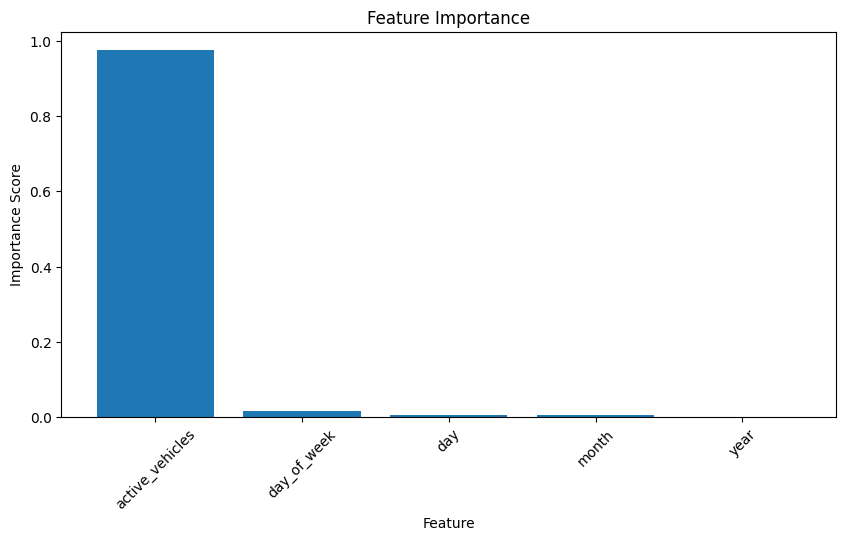

In [25]:
# Get feature importance
importances = model.feature_importances_
feature_names = X.columns  # Assuming X is the feature set

# Sort feature importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.show()


In [26]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Performance metrics

print("Tuned R² Score:", r2_score(y_test, y_pred_tuned))
print("Tuned RMSE:", mean_squared_error(y_test, y_pred_tuned))


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Tuned R² Score: 0.9863474040532556
Tuned RMSE: 1472154.3033183254


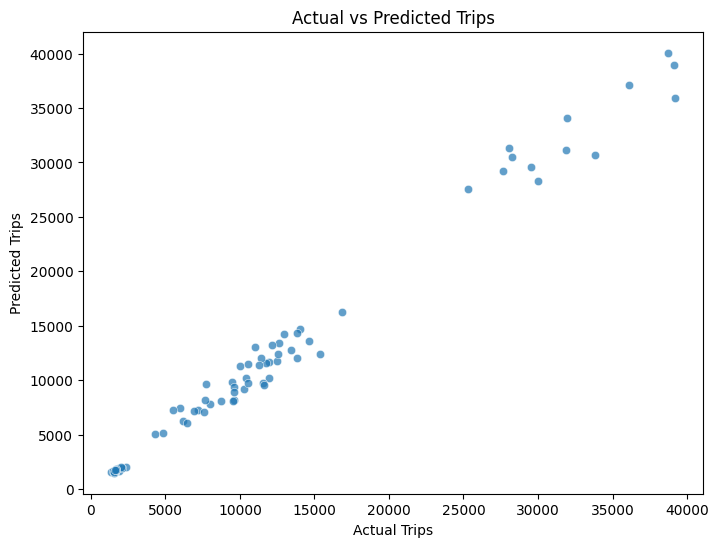

In [27]:
# Visualization of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Trips")
plt.ylabel("Predicted Trips")
plt.title("Actual vs Predicted Trips")
plt.show()

# **Conclusion**

1. Key Findings

Trips and active vehicles fluctuate daily, with peak demand on certain days.
Some dispatching bases handle more trips than others, indicating uneven demand distribution.
More active vehicles lead to more trips, showing a direct relationship.

2. Model Performance

RandomForestRegressor performed best, with an R² score of 0.98, meaning it predicts trips accurately.
GradientBoostingRegressor also performed well, making it a good alternative model.

3. Recommendations

✅ Increase vehicles during peak demand to serve more customers.

✅ Deploy vehicles strategically in high-trip areas for better efficiency.

✅ Use the model to forecast trips and plan resources in advance.

✅ Consider adding weather and traffic data for better predictions.